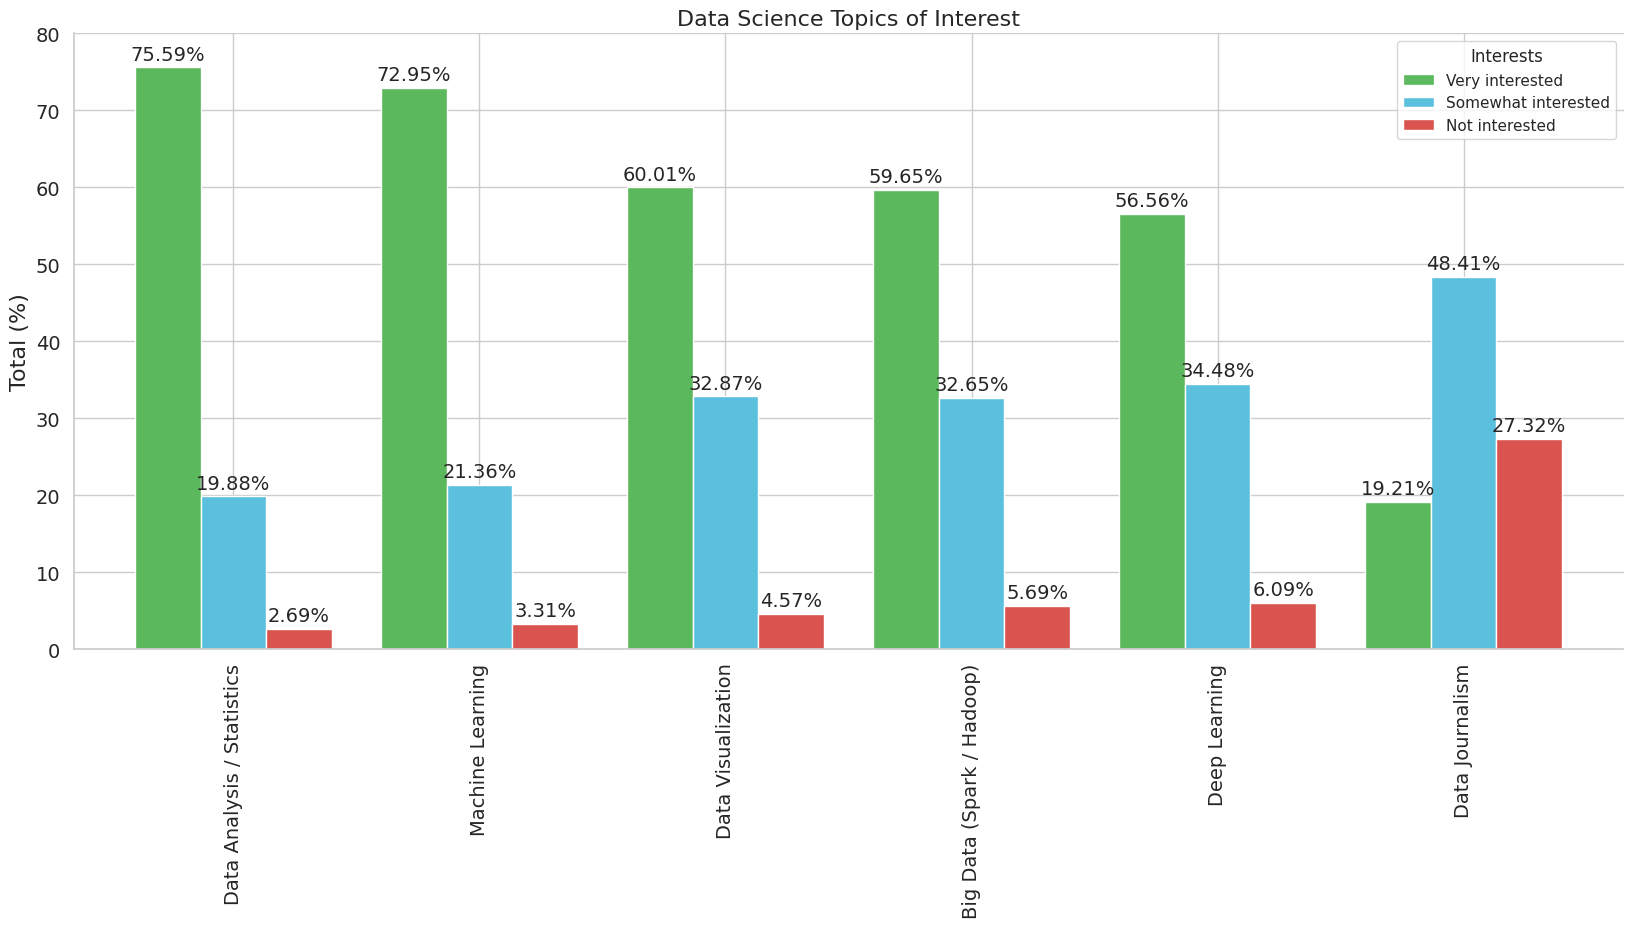

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Scatterplots + Theme
sns.set_theme(style="whitegrid", palette="dark")

#CVS
df = pd.read_csv('/content/Contents/Topic_Survey_Assignment.csv', index_col=0)

#Converts columns to numeric
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

#Counts to %
df_percentage = (df / 2233) * 100
df_percentage = df_percentage.round(2)

#Dataframe sorting by 'Very Interested'
df_percentage.sort_values(by='Very interested', ascending=False, inplace=True)

#Plot
ax = df_percentage.plot(kind='bar',
                        figsize=(20,8),
                        width=0.8,
                        color=['#5cb85c', '#5bc0de', '#d9534f'],
                        fontsize=14)

#Titles & Lables
ax.set_title('Data Science Topics of Interest', fontsize=16)
ax.set_ylabel('Total (%)', fontsize=16)
ax.legend(title='Interests')

#Borders Styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)

#Axis limit
ax.set_ylim (0, 80)

#Display % above bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.2f}%'.format(height),
    (x + width/2, y + height + 1),
    ha='center', fontsize=14)

#Display the plot
plt.show()

Data Analysis / Statistics is the most popular Data Science topic with 75.59% interest. This can be related to the sudden increase in the need for Data Analytics within organizations.

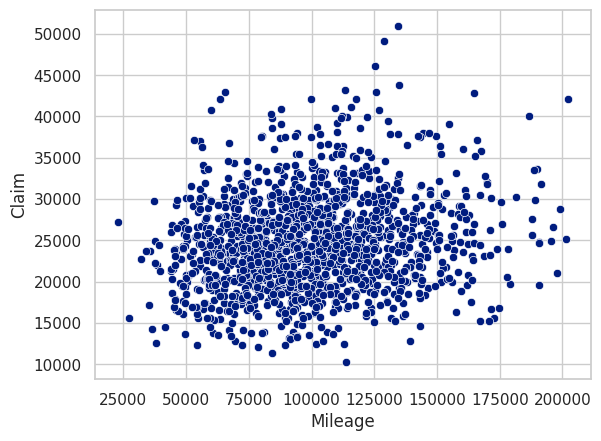

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#CVS Path
df_claims = pd.read_csv('/content/Contents/ClaimsData.csv')

#Scatterplots + Theme
sns.set_theme(style="whitegrid", palette="dark")

sns.scatterplot(data=df_claims, x='Mileage', y='Claim')
plt.show()



**Graph 1: Claim by Mileage**

For easier interpretation the data is segmented into 7 groups of Mileage.

1.  25k - 50k Mileage
2.  50k - 75k Mileage
1.  75k - 100k Mileage
2. 100k - 125k Mileage                                       
1. 125K - 150k Mileage
2. 150k - 175k Mileage
1. 175k - 200k Mileage

Group 1 shows that very little claims are made for cars within this group, with the highest claim being 30k. This is due to these vehilces being faily new. Group 2 to Group 5 have the most number of claims averaging 25k to 34k. These  vehicles have been on the road for more than 2 years and are more likey to get into accidents or broken parts due to wear and tear.Group 6 to Group 7 vehicles have the least amount of claims compared to Groups 2 to Group 5. Claims for cars with a 50k to 150k Mileage are high and frequently occuring.

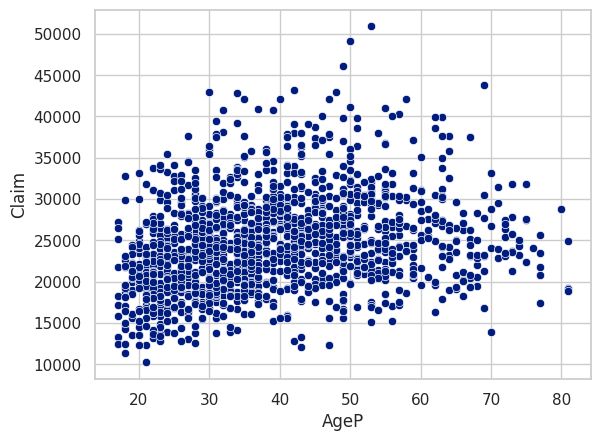

In [34]:
sns.scatterplot(data=df_claims, x='AgeP', y='Claim')
plt.show()

**Graph 2: Claim by AgeP**

For easier interpretation the data is segmented into 6 groups of Age.

1.  20 - 30 Years
2.  30 - 40 Years
1.  40 - 50 Years
2.  50 - 60 Years                                       
1.  60 - 70 Years
2.  70 - 80 Years

Group 1 and Group 2 have the most claims under 40k. This is so because these vehicles have the least amount of years on the road. Group 3 and Group 4 have the highets claims, with some claims reaching 50k. Group 5 and Group 6 have the least amount of claims as the vehicles are ranging from 6o to 80 years of use. 20 to 50 year old cars are prone to claims as opposed to older cars.


---





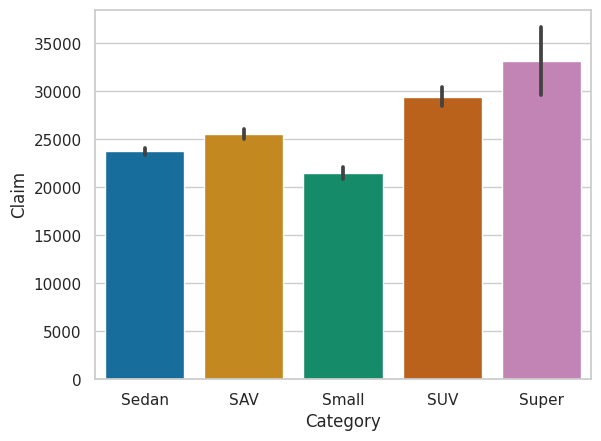

In [37]:
#Bar Graphs + Theme
sns.set_theme(style="whitegrid", palette="colorblind")

sns.barplot(data=df_claims, x='Category', y='Claim')
plt.show()



**Graph 1: Claim by Categry**

Small vehicles have the least amount of claims, followed by Sedans and SAV. Sedans have the least amount of claims because they stay longer on the road and are less likey to get into accidents. SUV's and Super vehicles have a higher claim rate due to them being high risky vehicles. These vehicles are used for off-roading and high speed driving thus putting them at a greater risk of accidents and rapid wear and tear, compared to the other vehicles. From this data one can conclude that SUV & Super vehilces are high risk vehicles leading to higher claims whilst Sedan and Small vehicles are the opposite as their claim value is lower.

---

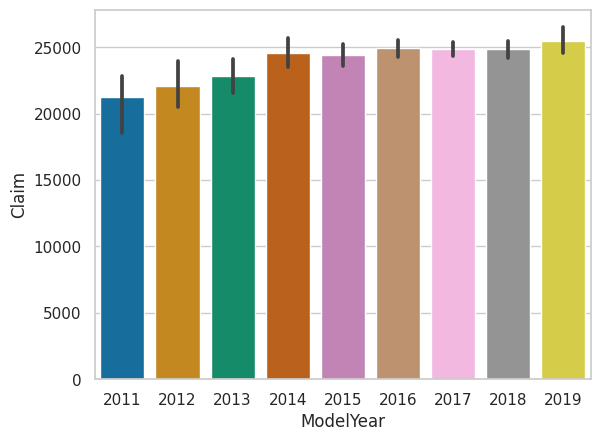

In [38]:
sns.barplot(data=df_claims, x='ModelYear', y='Claim')
plt.show()

**Graph 2: Claim by ModelYear**

They is a gradual increase in claims from 2011 to 2019. Newer vehicles are prone to claims comapared to older vehicles. This can be attributed to build quality and usage of the cars. The amount of claim increases by 1k from 2011 till 2014. It later dropped by 500 in 2015, only to increase by 1k in 2016. It remained constant from 2016 till 2018. This can be due to the build quality of vehicles within those years having improved thus leading to a drop in claims. For the first time in 8 years claims surpassed the 25k mark. From this data, it show's that claims are going to increase as the year's go by.


---



In [ ]:
#Mean claim amount by Vehicle Type
print(df_claims.groupby('Category')['Claim'].mean())

Category
SAV      25567.220256
SUV      29439.955177
Sedan    23759.341389
Small    21458.093665
Super    33107.498750
Name: Claim, dtype: float64


Super and SUV vehicles have the highest mean by claim of vehlces.

In [ ]:
#Mean claim amount by Model Year
print(df_claims.groupby('ModelYear')['Claim'].mean())

ModelYear
2011    21251.196667
2012    22089.076316
2013    22797.422576
2014    24559.396422
2015    24396.627463
2016    24930.396192
2017    24859.324408
2018    24844.633413
2019    25487.106147
Name: Claim, dtype: float64


Vehicles from 2014 to 2018 have the highest claims.

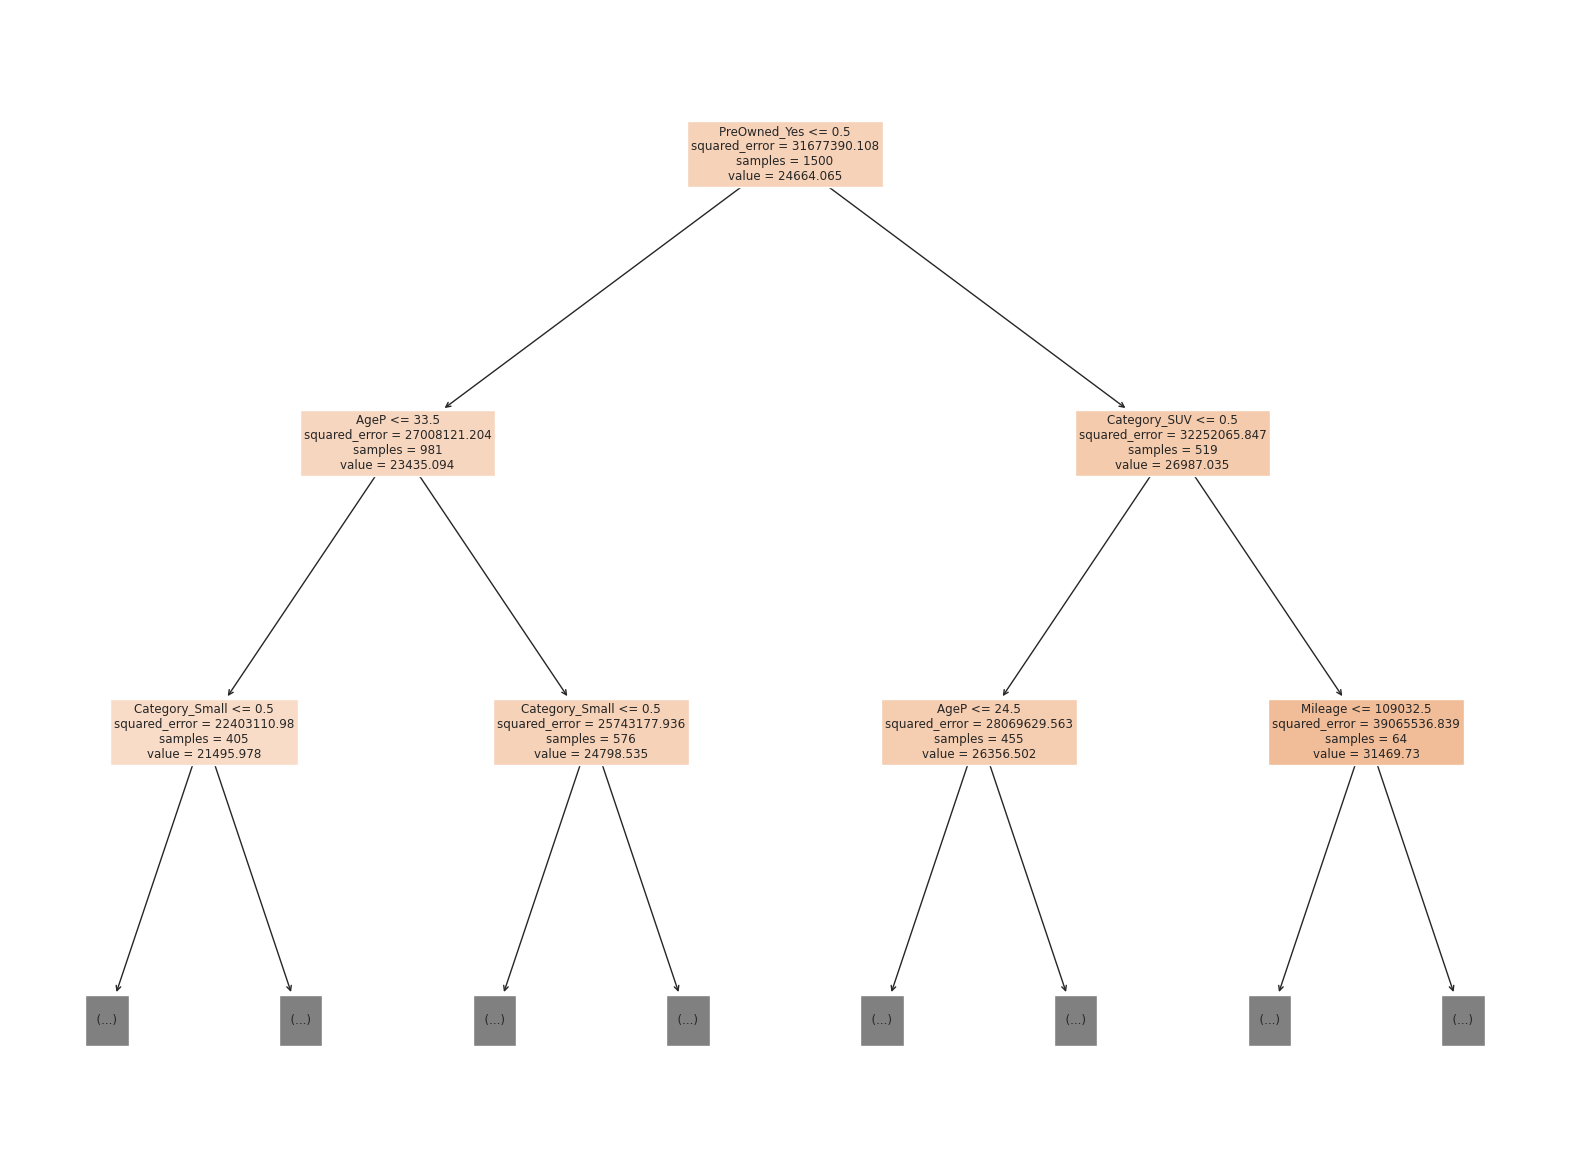

In [ ]:
#Pulling Claims Data from CVS
df_claims = pd.read_csv('/content/Contents/ClaimsData.csv')

#Libraries in use
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd

#Dataframe name = df_claims
x = df_claims.drop(columns=['Claim'])

#Target column 'Claim'
y = df_claims['Claim']

#Apply One-Hot Encoding
x = pd.get_dummies(x, drop_first=True)  # Converts categorical columns into one-hot encoded columns

#Tree model (Create & Fit)
tree = DecisionTreeRegressor(random_state=0)
tree.fit(x, y)

#Decision Tree clarity
plt.figure(figsize=(20, 15))

#Feature names from the preprocessed data for accurate labeling with Decision tree depth
plot_tree(tree, filled=True, feature_names=x.columns, max_depth=2)

# Display the plot
plt.show()

**References**

https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

---
https://matplotlib.org/stable/gallerylines_bars_and_markers/barchart.tml#sphx-glr-gallery-lines-bars-and-markers-barchart-py

---
https://pandas.pydata.org/pandas-docs/stable/


---
https://github.com/KeithGalli/pandas.git


---
https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py

---
https://github.com/ssumitshukla/subplot.git

---
https://seaborn.pydata.org/tutorial/color_palettes.html

---
https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree

---
https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/

---
Priyam, A., Abhijeeta, G. R., Rathee, A., & Srivastava, S. (2013). Comparative analysis of decision tree classification algorithms. International Journal of current engineering and technology, 3(2), 334-337.

---
Kotsiantis, S. B. (2013). Decision trees: a recent overview. Artificial Intelligence Review, 39, 261-283.


---



